<a href="https://colab.research.google.com/github/raissamiranda/Na-ve-Bayes-Spam-Filter/blob/main/Na%C3%AFveBayesSpamFilterL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naïve Bayes Spam Filter

**Raissa Miranda Maciel - 2020006965**

## Introduction

Spam detection is a significant problem in the digital age, where a large amount of information is exchanged daily through emails. Spam, or unsolicited emails, not only overload email servers but can also be harmful by containing malicious links or phishing attempts. Therefore, the classification of emails as spam or not spam (ham) is a crucial task to ensure security and efficiency in email communication.

This project aims to address the problem of spam detection using the Naive Bayes algorithm. Naive Bayes is a probabilistic classifier based on Bayes' Theorem, which assumes the independence of features. Despite this simplifying assumption, Naive Bayes has proven to be effective in various applications, especially in text classification, such as in the case of spam detection.

## Dataset Explanation

The dataset used in this project is a collection of SMS messages labeled as "spam" or "ham" (non-spam). The dataset contains text messages that are classified into these two categories, providing a basis for training and testing a spam detection model. Each message is accompanied by a label indicating whether it is spam or ham. The messages include various types of content, from casual conversations to promotional and phishing messages, making it a diverse set for training a text classification model.


In [116]:
import pandas as pd

# Load the dataset
file_path = 'SMSSpamCollection.txt'
data = pd.read_csv(file_path, sep='\t', header=None, names=['Label', 'Message'])

# Display the first few rows of the dataset
data.head(10)

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Data pre-processing

### Distribution of examples

The bar chart above shows the distribution of messages in the dataset, categorized as "spam" and "ham." The pink bar represents the number of "ham" messages, while the blue bar represents the number of "spam" messages.

From the chart, we can observe that there are significantly more "ham" (non-spam) messages compared to "spam" messages in the dataset. Specifically, the count of "ham" messages is around 5000, whereas the count of "spam" messages is approximately 700.

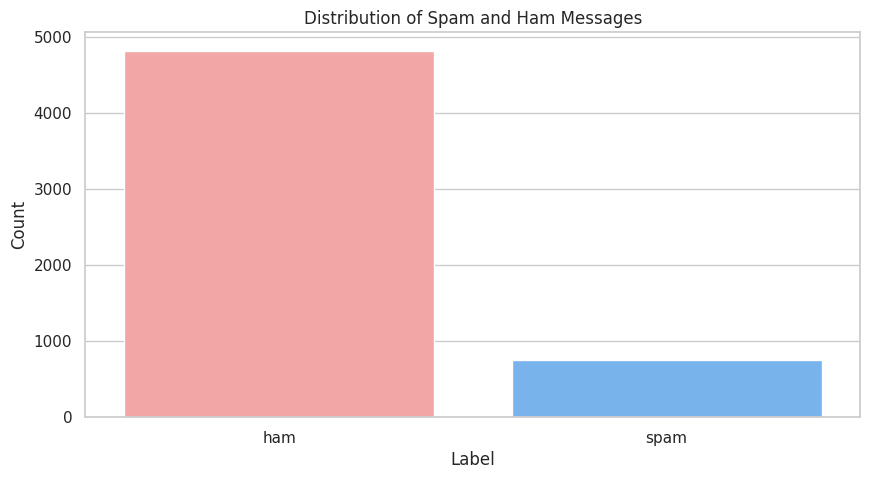

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# Plotting the distribution of spam and ham messages
plt.figure(figsize=(10, 5))
colors = ['#ff9999', '#66b3ff']
sns.countplot(x='Label', data=data, palette=colors, hue='Label', dodge=False, legend=False)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Distribution of message lengths

The histogram below shows the distribution of message lengths in the dataset, differentiating between spam and ham messages. From the chart, we can observe that ham messages tend to have a wider range of lengths, with a higher concentration of shorter messages and spam messages also vary in length but are generally shorter than ham messages, with fewer longer messages.

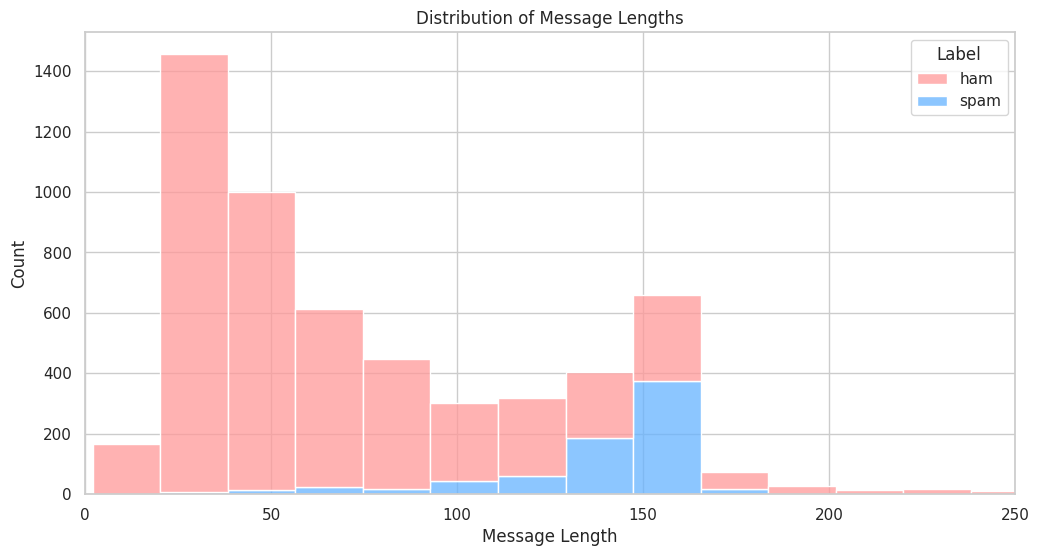

In [118]:
# Adding a column for message length
data['Length'] = data['Message'].apply(len)

# Plotting the distribution of message lengths
plt.figure(figsize=(12, 6))
colors = ['#ff9999', '#66b3ff']
sns.histplot(data=data, x='Length', hue='Label', multiple='stack', palette=colors, bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.xlim(0, 250)  # Adjusting the x-axis limit to make better use of space
plt.show()

###Word Clouds

> Spam Messages Word Cloud

The word cloud on the left visualizes the most frequent words found in spam messages. Words like "FREE," "call," "claim," "prize," and "text" are prominently displayed, indicating that these terms are common in spam messages. This suggests that many spam messages contain offers, promotions, or urgent calls to action, which are typical characteristics of spam.

> Ham Messages Word Cloud

The word cloud on the right represents the most frequent words in ham (non-spam) messages. Words such as "go," "now," "will," "got," and "love" are commonly found in these messages. This indicates that ham messages are more likely to contain everyday language and conversational terms, reflecting normal, non-spam communication.

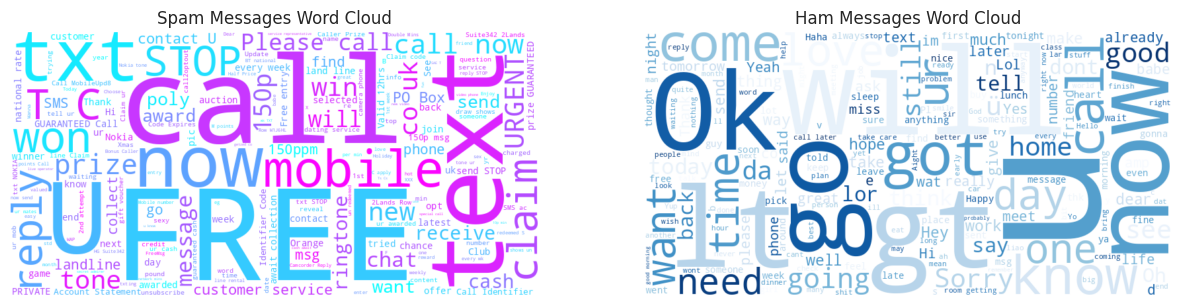

In [119]:
from wordcloud import WordCloud

# Gerando as word clouds para mensagens de spam e ham
spam_words = ' '.join(list(data[data['Label'] == 'spam']['Message']))
ham_words = ' '.join(list(data[data['Label'] == 'ham']['Message']))

spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cool').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_words)

# Plotando as word clouds
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

### Data cleaning

For this dataset, we want to clean the data to ensure it only contains words, all in lowercase, with all punctuation and stopwords removed. This helps in standardizing the text data for further analysis and modeling.

In [120]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Creating a new DataFrame for cleaned data
clean = data.copy()

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and non-alpha characters
    words = text.split()  # Split into words
    stop_words = set(stopwords.words('english'))  # Get the list of stopwords
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)  # Join the words back into a single string

# Apply the clean_text function to the Message column
clean['Message'] = clean['Message'].apply(clean_text)

# Display the first 20 rows of the cleaned DataFrame
clean.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Label,Message,Length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts st ...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61
5,spam,freemsg hey darling weeks word back id like fu...,147
6,ham,even brother like speak treat like aids patent,77
7,ham,per request melle melle oru minnaminunginte nu...,160
8,spam,winner valued network customer selected receiv...,157
9,spam,mobile months u r entitled update latest colou...,154


### Data splitting

The next step in preparing our dataset for modeling is to split the data into training and testing sets. This is a crucial step in machine learning, as it allows us to train our model on one portion of the data and evaluate its performance on another, ensuring that the model generalizes well to unseen data. For this purpose, we have used stratified sampling to split the data.

> Stratified Sampling

Stratified sampling ensures that the training and testing sets have the same proportion of class labels as the original dataset. This is particularly important when dealing with imbalanced datasets, such as our SMS spam dataset, where the number of ham (non-spam) messages significantly exceeds the number of spam messages. By maintaining the same class distribution, stratified sampling helps prevent the model from becoming biased towards the majority class and ensures a more balanced evaluation of the model's performance.

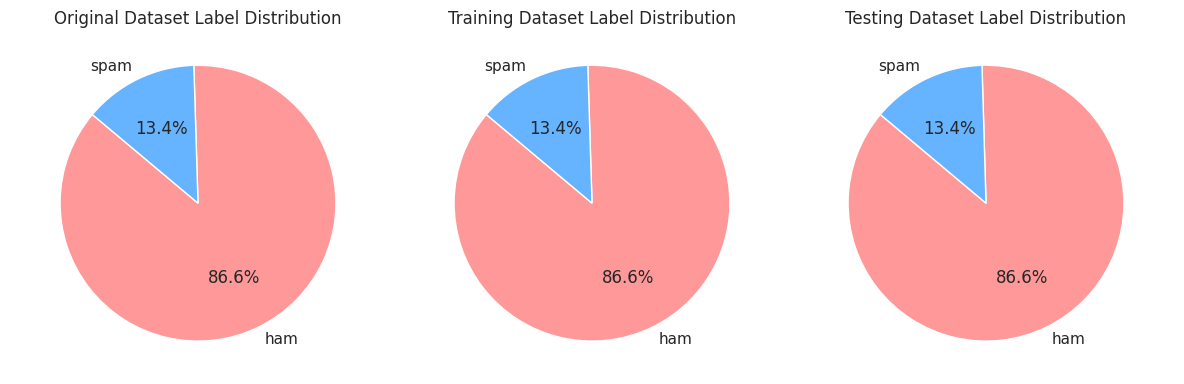

In [121]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets with stratified sampling
train_data, test_data = train_test_split(clean, test_size=0.25, random_state=2002, stratify=clean['Label'])

# Function to plot the distribution of labels as pie charts
def plot_pie_chart(data, title, ax):
    counts = data['Label'].value_counts()
    labels = counts.index
    sizes = counts.values
    colors = ['#ff9999', '#66b3ff']
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Creating subplots for pie charts
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Adjusted size for smaller pie charts

# Plotting the label distribution in the original, training, and testing datasets
plot_pie_chart(clean, 'Original Dataset Label Distribution', axs[0])
plot_pie_chart(train_data, 'Training Dataset Label Distribution', axs[1])
plot_pie_chart(test_data, 'Testing Dataset Label Distribution', axs[2])

# Display the plots
plt.tight_layout()
plt.show()

### Word Frequency Analysis

This step involves creating a DataFrame that contains each word and the number of times it appears in both spam and ham messages. Understanding the distribution of words in spam and ham messages will provide valuable insights and help in the feature extraction process, which is crucial for training an effective classification model.

In [122]:
from collections import defaultdict

# Tokenize the messages and count word frequencies in spam and ham messages
def tokenize_and_count(messages):
    word_count = defaultdict(int)
    for message in messages:
        words = message.split()
        for word in words:
            word_count[word] += 1
    return word_count

# Separate spam and ham messages
spam_messages = train_data[train_data['Label'] == 'spam']['Message']
ham_messages = train_data[train_data['Label'] == 'ham']['Message']

# Count word frequencies in spam and ham messages
spam_word_count = tokenize_and_count(spam_messages)
ham_word_count = tokenize_and_count(ham_messages)

# Create a DataFrame with the word frequencies
word_freq = pd.DataFrame({
    'word': list(set(spam_word_count.keys()).union(set(ham_word_count.keys()))),
    'spam': [spam_word_count[word] for word in list(set(spam_word_count.keys()).union(set(ham_word_count.keys())))],
    'ham': [ham_word_count[word] for word in list(set(spam_word_count.keys()).union(set(ham_word_count.keys())))]
})

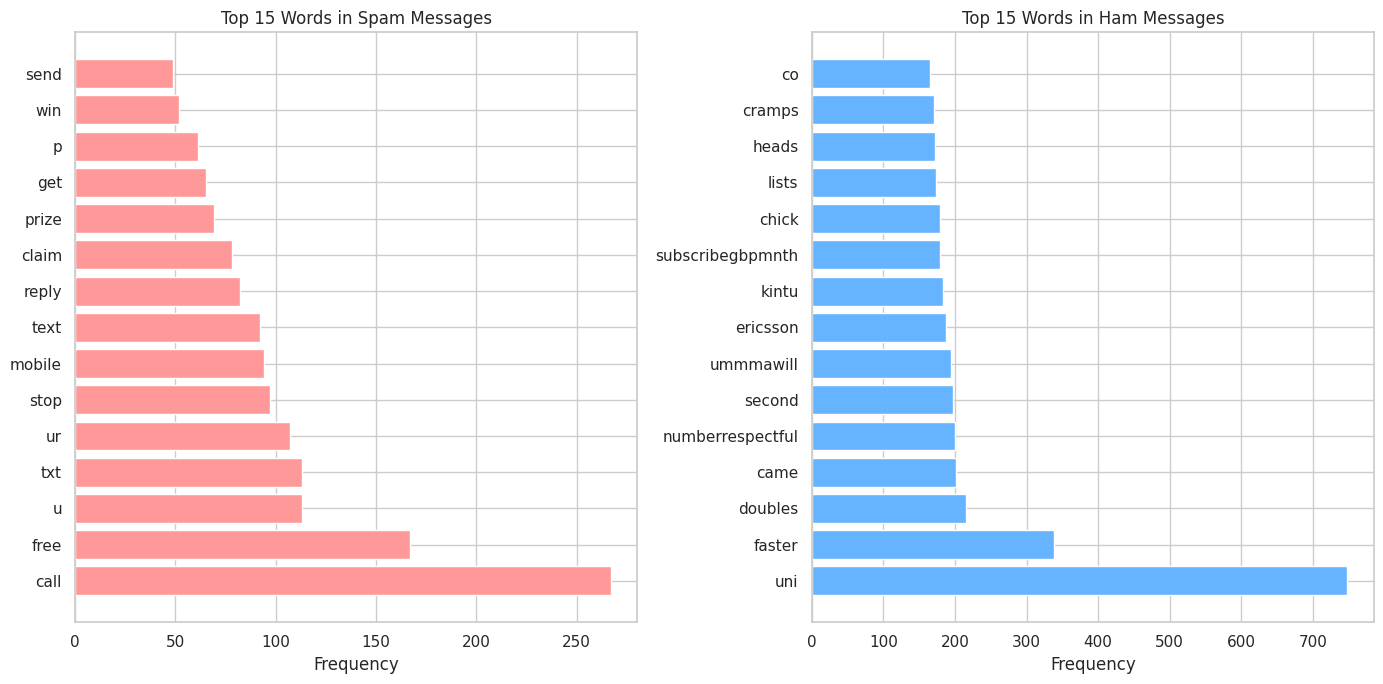

In [123]:
# Function to plot top N word frequencies in spam and ham messages
def plot_top_words(word_freq, top_n=20):
    # Sort the DataFrame by frequency in spam and ham messages
    top_spam_words = word_freq[['word', 'spam']].sort_values(by='spam', ascending=False).head(top_n)
    top_ham_words = word_freq[['word', 'ham']].sort_values(by='ham', ascending=False).head(top_n)

    # Plotting the top spam words
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.barh(top_spam_words['word'], top_spam_words['spam'], color='#ff9999')
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} Words in Spam Messages')

    # Plotting the top ham words
    plt.subplot(1, 2, 2)
    plt.barh(top_ham_words['word'], top_ham_words['ham'], color='#66b3ff')
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} Words in Ham Messages')

    plt.tight_layout()
    plt.show()

# Plot the top 20 words in each category
plot_top_words(word_freq, top_n=15)

## Multinomial Naive Bayes

### Introduction

The Multinomial Naive Bayes is particularly suited for discrete data, such as word counts in text classification problems. This algorithm calculates the probability that a given feature belongs to a particular class and uses these probabilities to predict the class of new data points.

First, we need to balance the dataset because it is highly imbalanced, with significantly more ham messages than spam messages. We separate the dataset into spam and ham data, then oversample the ham messages to match the number of spam messages, ensuring equal representation of both classes. This balanced dataset prevents the classifier from becoming biased towards the majority class (ham) and improves its performance on unseen data by providing a fair training process. Accurate word frequency calculations in this balanced dataset are crucial for the subsequent steps in training the Naive Bayes classifier effectively.

In [124]:
# Separate spam and ham data
spam_data = train_data[train_data['Label'] == 'spam']
ham_data = train_data[train_data['Label'] == 'ham']

# Oversample ham data to match the number of spam samples
ham_data_balanced = ham_data.sample(n=len(spam_data), replace=True, random_state=42)
train_data_balanced = pd.concat([spam_data, ham_data_balanced])

# Calculate word frequencies in the balanced dataset
word_freq = train_data_balanced['Message'].str.split(expand=True).stack().value_counts().reset_index()
word_freq.columns = ['word', 'freq']
word_freq['spam'] = 0
word_freq['ham'] = 0

# Iterate through each message and update word frequencies for spam and ham
for i, row in train_data_balanced.iterrows():
    for word in row['Message'].split():
        if row['Label'] == 'spam':
            word_freq.loc[word_freq['word'] == word, 'spam'] += 1
        else:
            word_freq.loc[word_freq['word'] == word, 'ham'] += 1

### Calculating conditional probabilities

To implement the Multinomial Naive Bayes algorithm, we need to calculate the following probabilities:

> $ P(E|S) $ :
   The probability of a word (event \(E\)) given that the message is spam $(S)$.

> $P(E|\neg S) $ :
   The probability of a word (event \(E\)) given that the message is not spam $(¬S)$.

The probabilities are calculated using the frequency of words in spam and ham messages. To avoid zero probabilities, we use Laplace smoothing, which adds a small pseudocount $(k)$ to each word count.

The probabilities can be calculated using the following formulas with Laplace smoothing:

$$
P(E|S) = \frac{\text{number of spams containing the word} + k}{\text{total number of spam messages} + 2 * k}
$$

$$
P(E|\neg S) = \frac{\text{number of hams containing the word} + k}{\text{total number of ham messages} + 2 * k}
$$


In [125]:
# Total number of spam and ham messages
total_spam = train_data_balanced[train_data_balanced['Label'] == 'spam'].shape[0]
total_ham = train_data_balanced[train_data_balanced['Label'] == 'ham'].shape[0]

# Pseudocount for Laplace smoothing
k = 0.5

# Calculate P(E|S) and P(E|¬S)
word_prob = word_freq.copy()
word_prob['likelihood_spam'] = (word_prob['spam'] + k) / (total_spam + 2 * k)
word_prob['likelihood_ham'] = (word_prob['ham'] + k) / (total_ham + 2 * k)

# Display the first few rows of the word_prob DataFrame
word_prob.head(20)

,word,freq,spam,ham,likelihood_spam,likelihood_ham
0,call,299,267,32,0.476827,0.057932
1,u,218,113,105,0.202317,0.188057
2,free,170,167,3,0.298574,0.006239
3,ur,134,107,27,0.191622,0.049020
4,txt,118,113,5,0.202317,0.009804
5,stop,100,97,3,0.173797,0.006239
6,mobile,98,94,4,0.168449,0.008021
7,text,96,92,4,0.164884,0.008021
8,get,92,65,27,0.116756,0.049020
9,reply,87,82,5,0.147059,0.009804


### Calculating prior probability

To implement the Multinomial Naive Bayes algorithm, we also need to calculate the prior probabilities of each class. The prior probability represents the initial degree of belief in the occurrence of an event before any additional evidence is taken into account.

For spam detection, the prior probabilities are:

> $ P(S) $ :
   The prior probability that any given message is spam.

> $P(\neg S) $ :
   The prior probability that any given message is not spam.
  
We use the following formula to calculate them:

$$
P(S) = \frac{\text{number of spam messages}}{\text{total number of messages}}
$$

$$
P(\neg S) = \frac{\text{number of non-spam messages}}{\text{total number of messages}}
$$

In [126]:
# Calculate prior probabilities
prior_spam = total_spam / (total_spam + total_ham)
prior_ham = total_ham / (total_spam + total_ham)

print(f"P(S): {prior_spam}")
print(f"P(¬S): {prior_ham}")

P(S): 0.5
P(¬S): 0.5


### Combining probabilities for classification

To classify a new message as spam or non-spam, we need to combine the prior probabilities and the conditional probabilities using Bayes' Theorem. This process allows us to calculate the posterior probabilities, which represent the updated probabilities of each class (spam or non-spam) given the features (words) in the message.

The posterior probability is the probability of the message being in a particular class (spam or non-spam) after observing the evidence (the words in the message). It is calculated using Bayes' Theorem, which in this context is expressed as:

$$
P(S|E) = \frac{P(E|S) \cdot P(S)}{P(E)}
$$

Rembering that:

> $P(S|E)$ is the posterior probability of the message being spam given the evidence $E$ (the words in the message).

> $P(E|S)$ is the likelihood of the evidence given that the message is spam.

> $P(S)$ is the prior probability of the message being spam.

> $P(E)$ is the probability of the evidence.

Since $P(E)$ is the same for both classes and does not affect the comparison, we can simplify the classification decision to comparing the numerators:

$$P(S|E) \propto P(E|S) \cdot P(S)$$

For practical reasons, we use logarithms to avoid underflow issues with very small probabilities. The log transformation turns products into sums, which are easier to manage computationally:

$$\log P(S|E) \propto \log P(E|S) + \log P(S)$$

Similarly, for the non-spam class $(\neg S)$:

$$\log P(\neg S|E) \propto \log P(E|\neg S) + \log P(\neg S)$$

Finally, the formulas for log posterior probability for a message $E = E_1, E_2, ... , E_n$ with words $E_i$ are:

$$\log P(S|E) \propto \log P(S) + \sum_{i=1}^{n} \log P(E_i|S)$$

$$\log P(\neg S|E) \propto \log P(\neg S) + \sum_{i=1}^{n} \log P(E_i|\neg S) $$

These final formulas calculate the log posterior probabilities of a message being classified as spam or non-spam. The message is classified based on the higher log posterior probability, providing a robust method for distinguishing between spam and non-spam messages.

In [127]:
import numpy as np

# Function to classify a new message
def classify_message(message):
    # Clean and tokenize the message
    words = clean_text(message).split()

    # Initialize log probabilities with log prior probabilities
    log_prob_spam = np.log(prior_spam)
    log_prob_ham = np.log(prior_ham)

    # Update log probabilities with log conditional probabilities
    for word in words:
        if word in word_prob['word'].values:
            likelihood_spam = word_prob[word_prob['word'] == word]['likelihood_spam'].values[0]
            likelihood_ham = word_prob[word_prob['word'] == word]['likelihood_ham'].values[0]
        else:
            # Apply Laplace smoothing for unseen words
            likelihood_spam = k / (total_spam + 2 * k)
            likelihood_ham = k / (total_ham + 2 * k)
        log_prob_spam += np.log(likelihood_spam)
        log_prob_ham += np.log(likelihood_ham)

    # Classify the message based on higher log posterior probability
    if log_prob_spam > log_prob_ham:
        result = 'spam'
    else:
        result = 'ham'

    return result

### Examples

We classified a series of sample messages to evaluate the performance of our Naive Bayes spam classifier. The sample messages were selected to include both typical spam and typical ham messages, using the most frequent words found in the respective categories.

From the results, we can see that the classifier correctly identified the spam messages, which contain common spam trigger words like "win", "free", "prize", and "urgent". Similarly, the ham messages, which include more conversational and less promotional language, were also correctly classified.

In [128]:
# Sample messages to classify
test_messages = [
    "Win a free mobile prize now",
    "Bless you for helping me",
    "Reply to claim your prize",
    "Havnt seen you in a while.",
    "Urgent! Claim your reward.",
    "Loving some veggie snacks",
    "Call now to win a free prize",
]


# Classify and store results in a DataFrame
results = []
for message in test_messages:
    classification = classify_message(message)
    results.append({'Message': message, 'Classification': classification})

results_df = pd.DataFrame(results)

# Display the DataFrame
from IPython.display import display
display(results_df)

,Message,Classification
0,Win a free mobile prize now,spam
1,Bless you for helping me,ham
2,Reply to claim your prize,spam
3,Havnt seen you in a while.,ham
4,Urgent! Claim your reward.,spam
5,Loving some veggie snacks,ham
6,Call now to win a free prize,spam


## Model Evaluation

In this section, we evaluate the performance of the trained Naive Bayes classifier on the test dataset. We define a function to classify messages and return their true and predicted labels. The evaluation metrics, including accuracy, precision, recall, and F1 score, are calculated to measure the model's performance.

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to classify messages and return results
def classify_and_evaluate(test_data):
    test_messages = test_data['Message'].tolist()
    true_labels = test_data['Label'].tolist()

    predictions = []

    for message in test_messages:
        classification = classify_message(message)
        predictions.append(classification)

    return true_labels, predictions

# Get true labels and predictions
true_labels, predictions = classify_and_evaluate(test_data)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, pos_label='spam')
recall = recall_score(true_labels, predictions, pos_label='spam')
f1 = f1_score(true_labels, predictions, pos_label='spam')

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.86
Precision: 0.50
Recall: 0.97
F1 Score: 0.66


## Final results


The confusion matrix generated for our Naive Bayes classifier provides a clear visual representation of its performance in distinguishing between spam and ham messages. The matrix reveals that the classifier correctly identified 1065 ham messages and 180 spam messages, indicating a strong capability in recognizing true positives and true negatives. However, it also misclassified 141 ham messages as spam (false positives) and 7 spam messages as ham (false negatives).

The high number of correctly classified ham messages demonstrates the classifier's effectiveness in handling non-spam messages. Despite this, the significant number of false positives indicates a need for improvement in precision. This means that while the classifier is good at identifying spam, it often incorrectly labels ham messages as spam, which could lead to unnecessary alerts or actions in a real-world application.

On the other hand, the classifier's ability to detect most spam messages highlights its strength in capturing spam, minimizing the chances of spam slipping through. The balance in the dataset played a critical role in achieving this, as it ensured that the classifier had sufficient examples of both spam and ham messages during training.



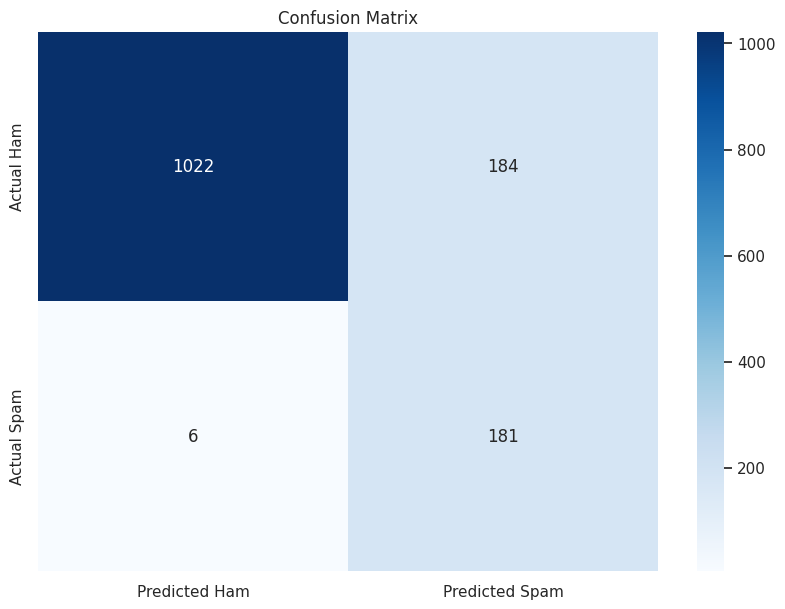

In [130]:
# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=['ham', 'spam'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Ham', 'Actual Spam'], columns=['Predicted Ham', 'Predicted Spam'])

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()